#### Importing Necessary Libraries

In [2]:
from IPython.core.debugger import set_trace
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os
import time
plt.style.use(style = 'seaborn')
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [66]:
df = pd.read_csv('US30CashqM30.csv')
df.head()

,Date,Time,Open,High,Low,Close,Volumes
0,2022.11.17,21:00,33552.31,33590.80,33480.62,33503.66,4564
1,2022.11.17,21:30,33503.64,33511.90,33440.78,33488.06,4566
2,2022.11.17,22:00,33488.07,33505.86,33382.39,33411.87,5008
3,2022.11.17,22:30,33410.87,33559.47,33404.90,33556.99,5154
4,2022.11.17,23:00,33555.99,33555.99,33497.73,33522.68,1851


In [42]:
df = df[['Close']].copy()

In [43]:
df.describe()

,Close
count,131.000000
mean,1.052958
std,0.033866
min,0.970340
25%,1.039580
50%,1.062450
75%,1.075840
max,1.098920


### Checking for Stationarity in the price series

In [44]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.Close.dropna())
print(f"ADP Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADP Statistic: -2.188385302225114
p-value: 0.2104878962590127


#### Autocorrelation Function (ACF)

In [45]:
from statsmodels.graphics.tsaplots import plot_acf

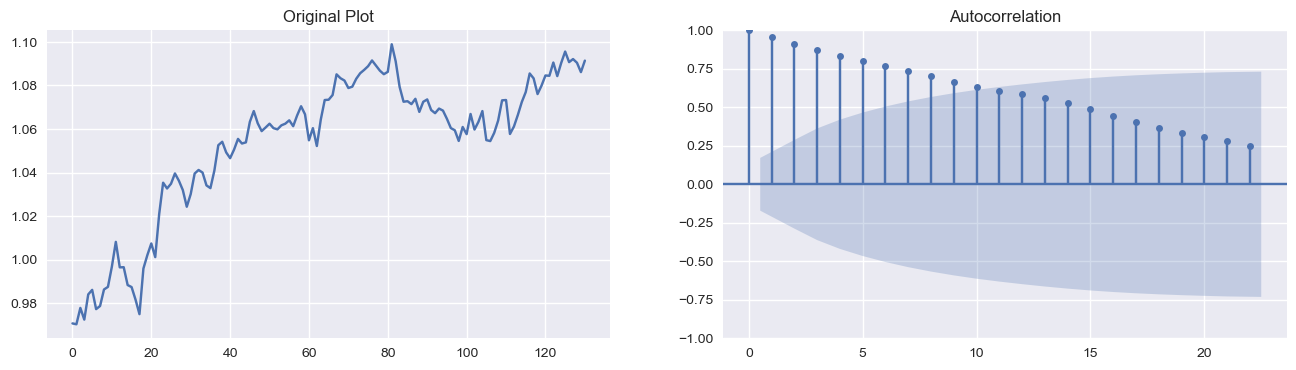

In [46]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(df.Close)
ax1.set_title('Original Plot')
plot_acf(df.Close, ax=ax2)

plt.show()


### Differencing Order - (d)

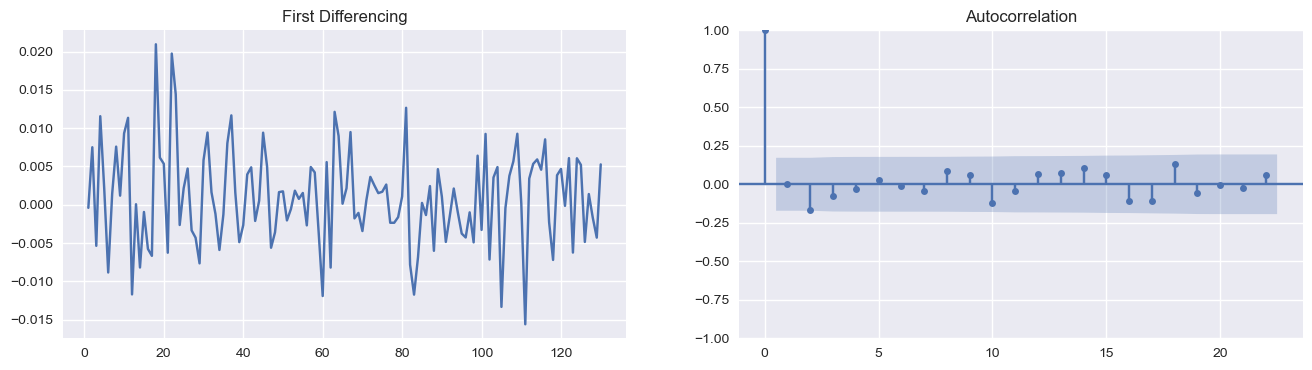

In [47]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title('First Differencing')
plot_acf(diff, ax=ax2)

plt.show()


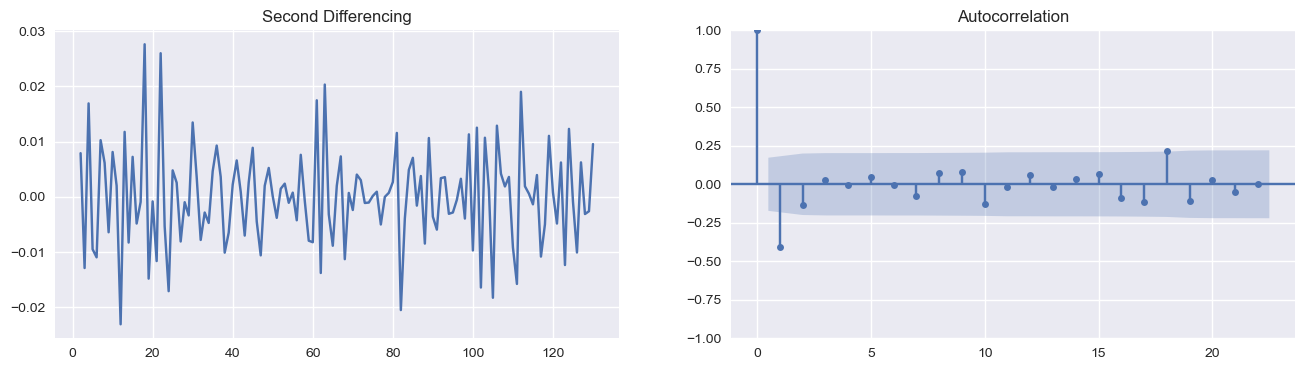

In [48]:
diff = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title('Second Differencing')
plot_acf(diff, ax=ax2)

plt.show()

##### To better understand the best number of differencing (ie: Order of Differencing) needed, we use the PMD-ARIMA Package

In [49]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.Close, test = 'adf')

1

### Autoregresive Order (p)

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


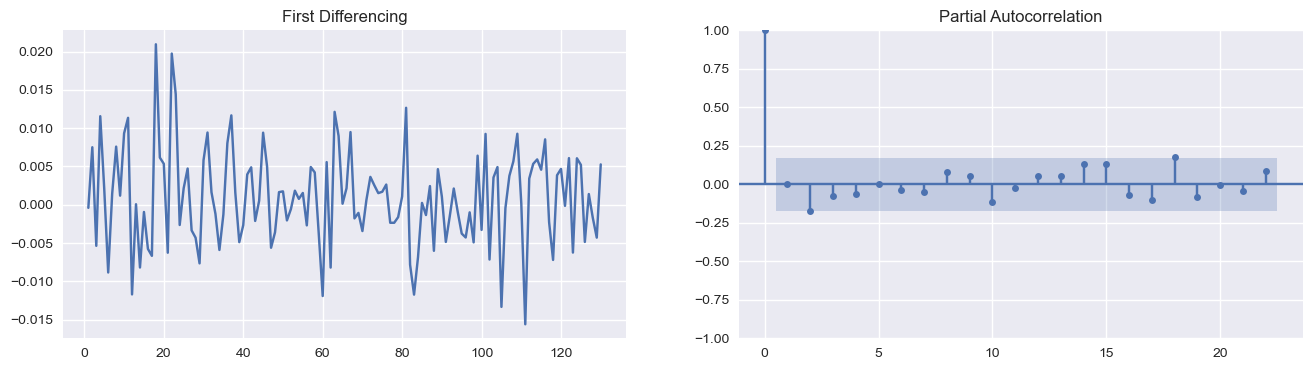

In [51]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title('First Differencing')
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2)

plt.show()

In this example I will use the lag 0

### Moving Average Order (q)

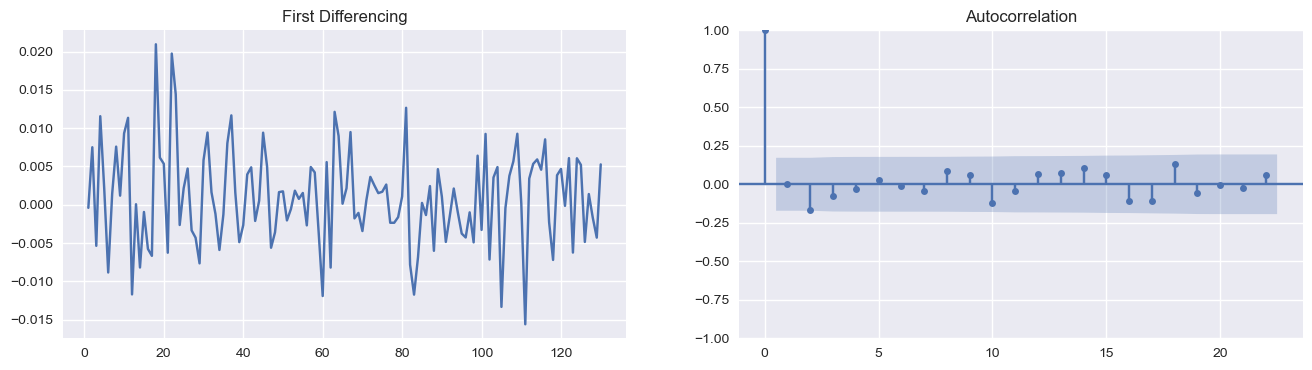

In [52]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title('First Differencing')
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2)

plt.show()

In this case I'll just coose the forecast error 0 as the most suitable for the model (q = 0)

## Fitting the Arima Model

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [60]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
model = ARIMA(df.Close, order=(0, 1, 0))
result = model.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 473.184
Date:                Thu, 15 Jun 2023   AIC                           -944.367
Time:                        19:46:38   BIC                           -941.500
Sample:                             0   HQIC                          -943.202
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.033e-05   4.36e-06      9.257      0.000    3.18e-05    4.89e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.99   Pr

In [62]:
#Plotting the Residual Errors

(array([10.06109873,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.07739307]),
 array([-0.0156  ,  0.083034,  0.181668,  0.280302,  0.378936,  0.47757 ,
         0.576204,  0.674838,  0.773472,  0.872106,  0.97074 ]),
 <BarContainer object of 10 artists>)

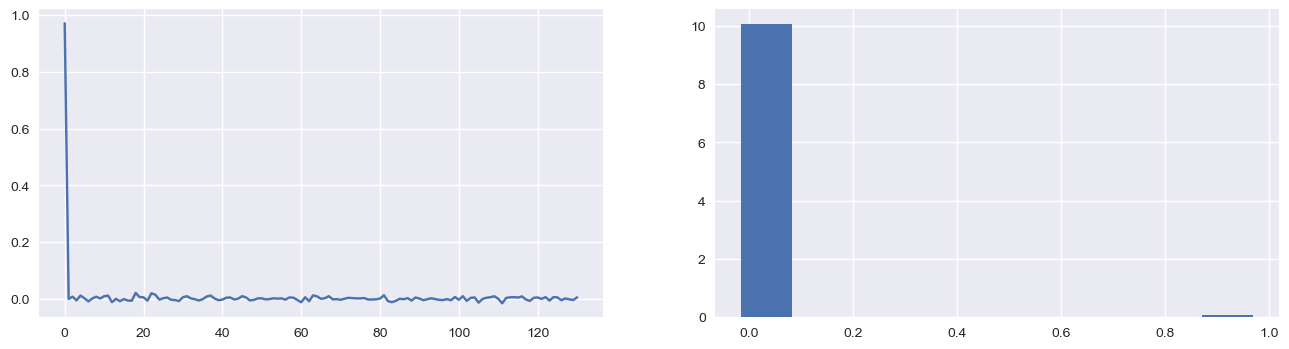

In [63]:
residuals = pd.DataFrame(result.resid)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 4))
ax1.plot(residuals)
ax2.hist(residuals, density= True)

In [64]:
#Lets Examine the actual results versus the predicted/fitted results

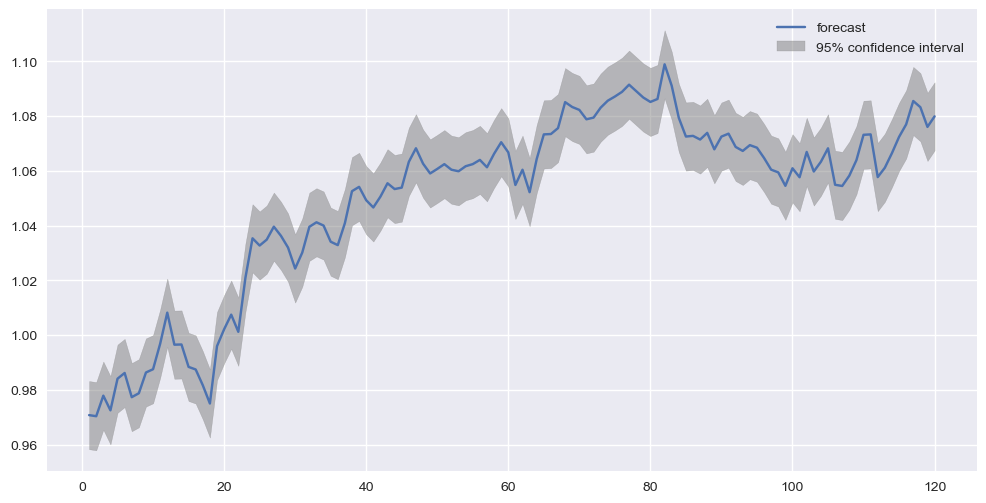

In [72]:
from statsmodels.graphics.tsaplots import plot_predict

# Plotting Predictions
fig, ax = plt.subplots(figsize=(12, 6))
plot_predict(result, start=1, end=120, dynamic=False, ax=ax)
plt.show()
